In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#Normalizar os dados
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#Ajudar na regularização da Rede Neural - Dropout
from tensorflow.keras.callbacks import EarlyStopping
#Ajudar na regularização da Rede Neural - EarlyStopping

In [ ]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
         'concave points_mean','symmetry_mean','fractal_dimension_mean']]
#Selecionamos os parâmetros que queremos trabalhar

In [ ]:
df.dropna(inplace=True) #Remover as linhas que não tem registro

In [ ]:
df.shape

(569, 11)

In [ ]:
df['diagnosis'] = df["diagnosis"].map({'M': 1, 'B': 0}) #Converter texto em número

In [ ]:
#separar o dados em variáveis preditoras (X) e a variável alvo (y)
X = df.drop('diagnosis', axis=1) # Dados previsores de entrada (características dos tumores)
y = df['diagnosis'] #variavel alvo (prever se é B ou M)

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)
#Padroniza os valores de X (previsores) para otimizar o treinamento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,#30% testes 70% treinamento
                                                    random_state=42)

In [ ]:
modelo = Sequential()
modelo.add(Dense(64, activation="relu", input_dim=X.shape[1]))
modelo.add(Dropout(0.5)) #Aleatoriamente, seleciona 50% dos dados e embaralha
modelo.add(Dense(32, activation="relu"))
modelo.add(Dropout(0.3)) #Aleatoriamente, seleciona 30% dos dados e embaralha
modelo.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#Interrompe o treinamento se ele ver que comea a piorar a partir de 10 épocas.
treino = modelo.fit(X_train, y_train, epochs=400, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5088 - loss: 0.7131 - val_accuracy: 0.8947 - val_loss: 0.5202
Epoch 2/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8029 - loss: 0.5029 - val_accuracy: 0.9181 - val_loss: 0.3949
Epoch 3/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8581 - loss: 0.4410 - val_accuracy: 0.9298 - val_loss: 0.3095
Epoch 4/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9026 - loss: 0.3593 - val_accuracy: 0.9240 - val_loss: 0.2460
Epoch 5/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9343 - loss: 0.2958 - val_accuracy: 0.9298 - val_loss: 0.2017
Epoch 6/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9202 - loss: 0.2536 - val_accuracy: 0.9415 - val_loss: 0.1714
Epoch 7/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9152 - loss: 0.2540 - val_accuracy: 0.9415 - val_loss: 0.1516
Epoch 8/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9376 - loss: 0.2017 - val_accuracy: 0.9415 -

In [ ]:
#Função pra ver o desempenho dos modelos
def avaliar(modelo, X, y, titulo):
  y_pred = (modelo.predict(X) > 0.5).astype(int)
  acc = accuracy_score(y, y_pred)
  print(f"{titulo} - Acurácia: {acc}")

In [ ]:
avaliar(modelo, X_test, y_test, "Modelo")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Modelo - Acurácia: 0.9824561403508771


/tmp/ipython-input-16-1883486270.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


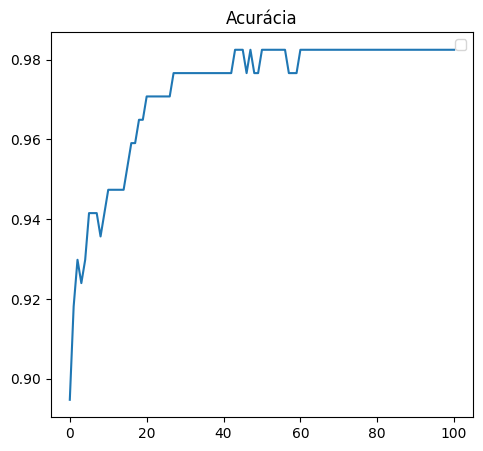

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(treino.history['val_accuracy'])
plt.title('Acurácia')
plt.legend()



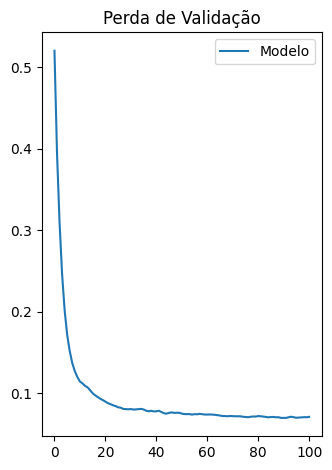

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(treino.history['val_loss'], label='Modelo')
plt.title('Perda de Validação')
plt.legend()

plt.tight_layout()
plt.show()

Valores aleatórios

In [ ]:
entrada = np.array([[
    14.5,     # radius_mean
    20.0,     # texture_mean
    95.0,     # perimeter_mean
    700.0,    # area_mean
    0.09,     # smoothness_mean
    0.08,     # compactness_mean
    0.05,     # concavity_mean
    0.04,     # concave points_mean
    0.18,     # symmetry_mean
    0.06,     # fractal_dimension_mean
]])

entrada = scale.transform(entrada) #normalização

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Valor maligno

In [ ]:
entrada = np.array([[
    21.0,     # radius_mean (alto)
    28.0,     # texture_mean (alto)
    140.0,    # perimeter_mean (alto)
    1400.0,   # area_mean (alto)
    0.15,     # smoothness_mean (acima da média)
    0.25,     # compactness_mean (alto)
    0.30,     # concavity_mean (alto)
    0.15,     # concave points_mean (alto)
    0.30,     # symmetry_mean (acima da média)
    0.09      # fractal_dimension_mean (mais irregular)
]])

entrada = scale.transform(entrada)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Desafio


In [ ]:
entrada = np.array([[
    16.0,     # radius_mean (intermediário, mais próximo do maligno)
    18.0,     # texture_mean (alto, maligno)
    105.0,    # perimeter_mean (moderado)
    850.0,    # area_mean (entre médio e alto)
    0.10,     # smoothness_mean (neutro)
    0.14,     # compactness_mean (intermediário)
    0.12,     # concavity_mean (entre benigno e maligno)
    0.08,     # concave points_mean (levemente acima da média)
    0.22,     # symmetry_mean (acima da média)
    0.065     # fractal_dimension_mean (ligeiramente irregular)
]])

entrada = scale.transform(entrada)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Por que esse exemplo é desafiador?

  Alguns valores sugerem malignidade (como texture_mean, symmetry_mean e concavity_mean),

  Outros valores estão mais próximos de tumores benignos (como smoothness_mean e concave points_mean).

  Esse tipo de entrada representa casos de "limítrofes" nesse casos, apenas com imagem ou exame simples não é possível ter certeza do tipo do tumor, o que exige mais do modelo — e se ele tiver overfitting ou for muito simples, pode errar.

In [ ]:
predicao = modelo.predict(entrada)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [ ]:
print('Resultado da predição:', 'Maligno' if predicao[0][0] > 0.5 else 'Benigno')

Resultado da predição: Maligno
